In [1]:
# Importing Libraries
# Read Data
# Explore and pre-process text
# Topic Modeling

In [2]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth",200)

In [3]:
# open the file using open() function

file = open('bbc_sports_articles/003.txt', mode = 'rt', encoding = 'utf-8')

# read the content of the file using .read() function

text = file.read()

# close the file using .close() function

file.close()

In [4]:
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

In [5]:
# Reading all the files 

file_names = os.listdir("bbc_sports_articles")

In [6]:
len(file_names)

471

In [7]:
# print first 10 file names

file_names[:10]

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [8]:
articles = []

#read all articles
for f in file_names:
    file = open('bbc_sports_articles/'+f, mode = 'rt', encoding = 'utf-8')
    text = file.read()
    file.close()
    
    articles.append(text)

In [9]:
len(articles)

471

## Data Exploration and pre-processing text

In [10]:
articles[300]

'Scrum-half Williams rejoins Bath\n\nBath have signed their former scrum-half Andy Williams on a short-term deal from the Neath-Swansea Ospreys.\n\nWales international Williams, whose contract with the Welsh region was due to expire in June, has agreed a contract until the end of the season. With Martyn Wood\'s injury likely to keep him out until February, Bath need experienced back-up to Nick Walshe. Said Williams: "When this opportunity presented itself, I did not really have to think twice about it." Williams, capped by Wales against Romania in 2003, should figure in the match squad for Monday\'s Zurich Premiership match at Sale Sharks. He lost his Ospreys starting place to New Zealander Jason Spice and has fallen further behind in the pecking order. The Welsh region has two outstanding young No 9 prospects in Richie Rees and Rhodri Wells. Bath director of rugby Jack Rowell, though, believes Williams fits the bill perfectly. "He has been playing regular Heineken Cup and Celtic Leagu

In [11]:
articles[233]

'Ref stands by Scotland decisions\n\nThe referee from Saturday\'s France v Scotland Six Nations match has defended the officials\' handling of the game after criticism by Matt Williams.\n\nThe Scotland coach said his side were robbed of victory by poor decisions made by the officials. But Nigel Williams said: "I\'m satisfied the game was handled correctly." Meanwhile, Matt Williams will not be punished by the Scottish Rugby Union for allegedly using bad language in his comments about the officials. He denies having done so. Nonetheless, he was furious about several decisions that he felt denied his side a famous victory. But Nigel Williams told the Scottish Daily Mail: "I spoke to Matt Williams at the post-match dinner. "He made no mention of the disallowed try or any other refereeing decisions whatsoever. "If Matt has issues with the match officials, then he is very welcome to phone me and discuss them. "Ultimately there is a match assessor at every international game to give an impar

we can see new lines \n and back slash in all the articles

In [12]:
clean_articles = []

for i in articles:
    clean_articles.append(i.replace("\n"," ").replace("\'", " "))
    

In [13]:
clean_articles[54]

'Holmes is hit by hamstring injury  Kelly Holmes has been forced out of this weekend s European Indoor Athletics Championships after picking up a hamstring injury during training.  The double Olympic champion said: "I am very disappointed that I have been forced to withdraw. "I can hardly walk at the moment and I won t be able to do any running for two or three weeks although I ll be keeping fit as best I can." Holmes will have now have intensive treatment in South Africa.  The 34-year-old made a cautious start to the season but looked back to her best when she stormed to the 1,000m title at the Birmingham Grand Prix 10 days ago. After that race and more progress in training, Holmes revealed she had decided to compete at the European Indoors before her plans were wrecked last weekend. "On Saturday night I pulled my hamstring running the last bend on my final 200m of the night," said Holmes. "I was going really, really well when I felt a massive spasm in my left leg and my hamstring ble

Still there are numbers, punctuations and special characters which need to be removed

In [14]:
clean_articles = [re.sub("[^a-zA-z]"," ",x) for x in clean_articles] # Replaces anything that is not alphabet

In [15]:
clean_articles[54]

'Holmes is hit by hamstring injury  Kelly Holmes has been forced out of this weekend s European Indoor Athletics Championships after picking up a hamstring injury during training   The double Olympic champion said   I am very disappointed that I have been forced to withdraw   I can hardly walk at the moment and I won t be able to do any running for two or three weeks although I ll be keeping fit as best I can   Holmes will have now have intensive treatment in South Africa   The    year old made a cautious start to the season but looked back to her best when she stormed to the      m title at the Birmingham Grand Prix    days ago  After that race and more progress in training  Holmes revealed she had decided to compete at the European Indoors before her plans were wrecked last weekend   On Saturday night I pulled my hamstring running the last bend on my final    m of the night   said Holmes   I was going really  really well when I felt a massive spasm in my left leg and my hamstring ble

You can see lot of spaces and single character terms which are not useful

In [16]:
clean_articles = [' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles] 

In [17]:
clean_articles[54]

'Holmes is hit by hamstring injury Kelly Holmes has been forced out of this weekend European Indoor Athletics Championships after picking up hamstring injury during training The double Olympic champion said am very disappointed that have been forced to withdraw can hardly walk at the moment and won be able to do any running for two or three weeks although ll be keeping fit as best can Holmes will have now have intensive treatment in South Africa The year old made cautious start to the season but looked back to her best when she stormed to the title at the Birmingham Grand Prix days ago After that race and more progress in training Holmes revealed she had decided to compete at the European Indoors before her plans were wrecked last weekend On Saturday night pulled my hamstring running the last bend on my final of the night said Holmes was going really really well when felt massive spasm in my left leg and my hamstring blew saw the doctor here and he has said it is not serious but it fru

It is best practice to convert the text into lower case. Otherwise it unnecssarily increases the number of unique words which will lead to more computation demand

But/but ---> these will be considered as 2 words

In [18]:
clean_articles = [x.lower() for x in clean_articles]

In [19]:
clean_articles[54]

'holmes is hit by hamstring injury kelly holmes has been forced out of this weekend european indoor athletics championships after picking up hamstring injury during training the double olympic champion said am very disappointed that have been forced to withdraw can hardly walk at the moment and won be able to do any running for two or three weeks although ll be keeping fit as best can holmes will have now have intensive treatment in south africa the year old made cautious start to the season but looked back to her best when she stormed to the title at the birmingham grand prix days ago after that race and more progress in training holmes revealed she had decided to compete at the european indoors before her plans were wrecked last weekend on saturday night pulled my hamstring running the last bend on my final of the night said holmes was going really really well when felt massive spasm in my left leg and my hamstring blew saw the doctor here and he has said it is not serious but it fru

In [20]:
type(clean_articles)

list

We need to do Topic Modeling to see the relavant words (Sports) more often

In [21]:
# function to pick to top 30 words from our data

def freq_words(x, terms=30):
    
    # combine all the articles
    text =' '.join([text for text in x])
    
    #split text into words
    all_words = text.split()
    
    #prepare a dictionary of word-frequency pairs
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #select top n most frequent words
    
    d = words_df.nlargest(columns = 'count', n = terms)
    
    #plot the word counts
    
    plt.figure(figsize = (20,5))
    ax = sns.barplot(data = d, x ='word', y = 'count')
    
    ax.set(ylabel = 'Count')
    plt.show()
    

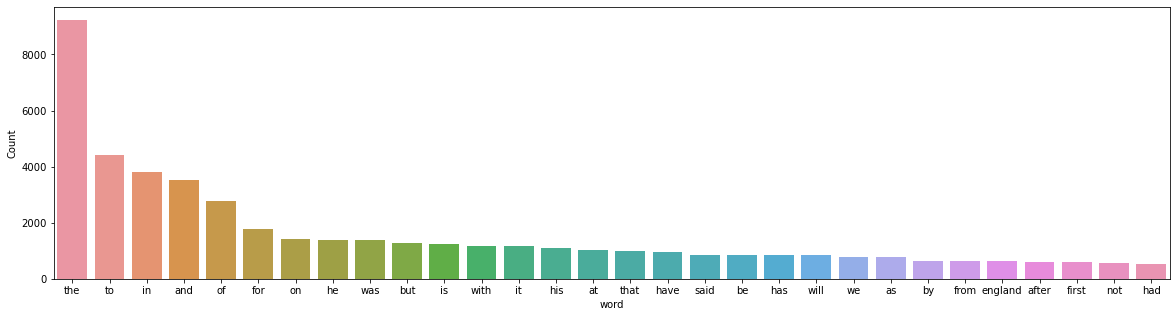

In [22]:
freq_words(clean_articles)

It is advisable first normlizing the words and the remove the stop words. Becasue after normalization, non stop word can get converted into stopwords

Normalization can be done with SpaCy as well as NLTK

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
#lemmatization

clean_articles = [' '.join([token.lemma_ for token in nlp(x)]) for x in clean_articles]

#remove stopwords

clean_articles = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_articles]

In [25]:
clean_articles[54]

'holme hit hamstre injury kelly holme force weekend european indoor athletic championship pick hamstre injury train double olympic champion disappointed force withdraw hardly walk moment win able run week fit best holme intensive treatment south africa year old cautious start season look -PRON- good -PRON- storm title birmingham grand prix day ago race progress training holme reveal -PRON- decide compete european indoor -PRON- plan wreck weekend saturday night pull -PRON- hamstring run bend -PRON- final night holme feel massive spasm -PRON- left leg -PRON- hamstring blow doctor -PRON- -PRON- -PRON- frustrating miss madrid know great shape holme advise -PRON- coach margot jenning rush training -PRON- unlikely -PRON- compete summer helen clitheroe madrid british competitor woman representative'

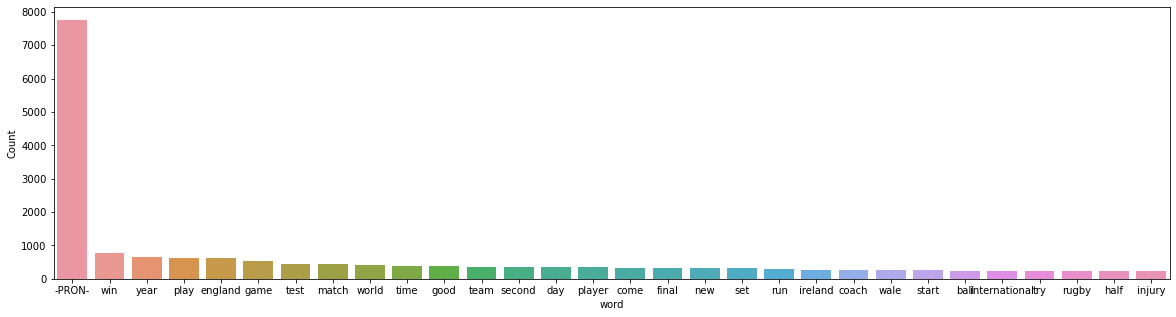

In [26]:
freq_words(clean_articles)

There are many pronouns replaced with a tag 'PRON', this is a technical issue with Spacy. We need to manually remove this tag

In [27]:
# remove -PRON- tags
clean_articles = [re.sub('-PRON-','',i) for i in clean_articles]

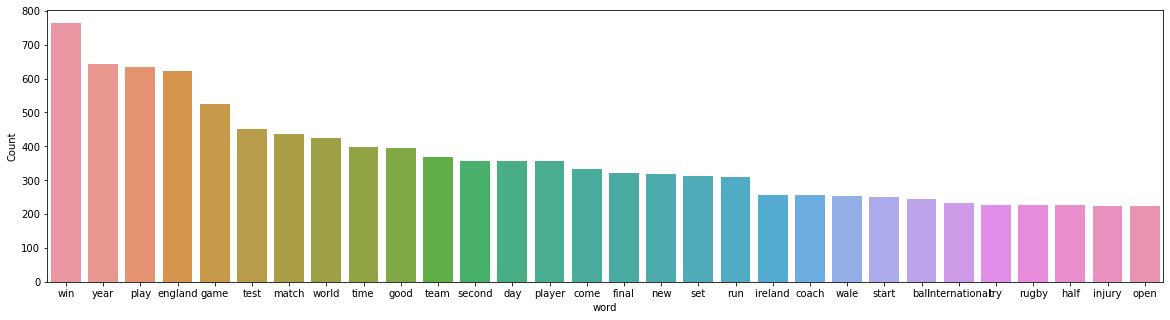

In [28]:
freq_words(clean_articles)

### Categorization using Topic Modelling using LSA

In [29]:
# Step1: Create a Document Term Matrix (Rows X Columns = Documents X Unique Words)

def get_words(x):
    text = ' '.join([text for text in x])
    return set(text.split())

In [30]:
unique_words = get_words(clean_articles)
len(unique_words)

7583

Rows X Columns = 471 x 7583

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 7579)

Need to understand why it is 7579 instead of 7583

In [32]:
# To View this matrix, need convert into sparse dataframe

X_df = pd.SparseDataFrame(X,columns=vectorizer.get_feature_names(), index = range(len(clean_articles)), default_fill_value =0)

C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4583: FutureWarning: SparseSeries is deprecated and will be removed in a f

In [33]:
X_df

C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:745: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self._default_fill_value,
C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5997: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(data).__finalize__(self)
C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose

,aaa,aaas,aac,aakash,aaron,ab,abandon,abate,abbott,abc,...,zimbabwean,zinc,zoe,zondeki,zone,zornotza,ztl,zuluaga,zurich,zvonareva
0,0.0,0.096478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Analyze the warning later, very interesting

Now randomly check the subset of this data frame

In [34]:
X_df.iloc[:10, 1000:1020]

C:\Users\chalampp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


,carlo,carlos,carlsen,carolina,carr,carrier,carroll,carry,carter,cartilage,carve,carwyn,cas,case,casey,cash,casson,cast,castaignede,castigate
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.105013,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.375388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.051751,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


We can see most of the values are zero except few. This is because it is sparse matrix. There is no benefit keeping this terms and will not help in distinguishing the articles. We will keep n most important terms as features of the document term matrix.

In [35]:
# Showing 1000 most important words (max_features). This is nothing but reducing the sparsity of Document Term Matrix

# min_df (Minimum document frequency, it means any word that appears less than 5 times would be ignored)

# max_df (Maximum document frequency, which means terms that appear more than 90% of the document would be ignored)
# for example: Term 'player' would be appearing in each of the article which will not be useful in distinguishing the article
# we can try different hyperparameters and see the combinations

vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features=1000, min_df = 5, max_df = 0.9)

X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 1000)

This is exactly matching what they have shown.

Important Requirement for LSA: All the documents should be represented by same vectors and size of the vector is the number of the topics

The idea is segregate the categorize articles into handful of topics or categories say 4 or 5. Therefore we need to reduce the dimensionality of Document Term Matrix from 1000 to much smaller number(desired topics). If we want to convert into K topics then this matrix would be 471 X K 

Refer to a screen shot in the notes for Dimensionality Reduction.

SVD will give three matrix after decomposition. 

1. Document Topic Matrix (Uk): The matrix contain vectors for every articles, the length of the vector is k   
   which is the number of topics specified by the user.

2. Topic Term Matrix (VkT) - This matrix contain 1000 terms which were used to prepare Document Term Matrix. n is the number of    terms and k is the number of topics.

3. Topic Vs Topic Matrix (S) - This matrix won't be used for this analysis and can be ignored this.

In [36]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter = 100)

In [37]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=12, tol=0.0)

How to find how good our model is? Easiest way is by printing the most important words corresponding to each topic.

Suppose, if our model shows the below terms in one topic then it is with good performance.

    goal    midfilder  striker   attacker   corner   goalkeeper
    
Similarly, if you get mix terms like below in one topic, then our model is not performing well

    run    ball   racket   pedal

In [39]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms,comp)
    sorted_terms = sorted(terms_comp, key = lambda x:x[1], reverse = True)[:50]
    
    print("Topic "+str(i)+": ")
    topics =[]
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'test', 'match', 'world', 'good', 'wale', 'player', 'team', 'ireland', 'final', 'time', 'day', 'new', 'cricket', 'rugby', 'second', 'come', 'france', 'set', 'open', 'run', 'injury', 'coach', 'cup', 'think', 'half', 'tour', 'australia', 'south', 'nation', 'start', 'series', 'international', 'victory', 'champion', 'beat', 'try', 'week', 'captain', 'great', 'william', 'season', 'robinson', 'ball', 'lose', 've']


Topic 1: 
['olympic', 'indoor', 'champion', 'win', 'seed', 'world', 'title', 'race', 'open', 'final', 'european', 'set', 'year', 'holme', 'roddick', 'woman', 'event', 'championship', 'athen', 'compete', 'record', 'round', 'britain', 'athlete', 'birmingham', 'federer', 'hewitt', 'break', 'gold', 'beat', 'jump', 'grand', 'american', 'british', 'medal', 'agassi', 'australian', 'athletic', 'second', 'davenport', 'marathon', 'double', 'madrid', 'russian', 'tennis', 'cross', 'old', 'francis', 'henman', 'safin']


Topic 2: 
['wale', '

The above is topic wise top 50 words.

In [40]:
# Final stage - Article Categorization

# Step 1:  Article Topic Matrix (This is already there as a part of Singular Value decomposition Uk)

lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(471, 4)

In [41]:
lsa_topic_matrix

array([[ 0.28387325,  0.26412487, -0.10315764,  0.09860201],
       [ 0.2234021 ,  0.07341423,  0.04809807,  0.11615841],
       [ 0.26250414,  0.24808623, -0.09566706,  0.04876066],
       ...,
       [ 0.19991017,  0.18623788, -0.03214824, -0.30160278],
       [ 0.37112345,  0.2381891 , -0.03753487, -0.3529605 ],
       [ 0.25623116,  0.18595445, -0.03474909, -0.28889292]])

Most dominent topic for first Article would be

In [43]:
lsa_topic_matrix[0] #The first topic, it has the maximum value

array([ 0.28387325,  0.26412487, -0.10315764,  0.09860201])

Let us try to find the topic of some article.

In [44]:
articles[9] # This belongs to Athletics. Hence it should belong to Topic 1

'Collins to compete in Birmingham\n\nWorld and Commonwealth 100m champion Kim Collins will compete in the 60m at the Norwich Union Grand Prix in Birmingham on 18 February.\n\nThe St Kitts and Nevis star joins British Olympic relay gold medallists Jason Gardener and Mark Lewis-Francis. Sydney Olympic 100m champion and world indoor record holder Maurice Greene and Athens Olympic 100m silver medallist Francis Obikwelu will also take part. Collins ran in Birmingham at the 2003 World Indoor Championships. "I\'m looking forward to competing against such a strong field," he said. "I got a great reception form the crowd at the NIA when I won my 60m world indoor silver medal in 2003 and it will be really exciting to return to this venue." The world champion says he\'s in good shape but he isn\'t underestimating the home competition. "Jason Gardener and Mark Lewis-Francis are Olympic gold medallists now and I\'m sure they\'ll be aiming to win in front of their home supporters. "I\'m looking forw

In [45]:
np.argmax(lsa_topic_matrix[9]) # This gives the topic number

1

In [47]:
np.argmax(lsa_topic_matrix[10]) # Cricket

0

Assignment: Apply LDA Algorithm and work on Categorization and compare the result with LSA